In [1]:
import tensorflow as tf

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\archive (3)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\archive (3)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[165.25 161.25 158.25]
   [160.25 156.25 153.25]
   [163.   159.   156.  ]
   ...
   [194.   194.   196.  ]
   [192.75 192.75 194.75]
   [192.   192.   194.  ]]

  [[161.25 157.25 154.25]
   [160.5  156.5  153.5 ]
   [163.5  159.5  156.5 ]
   ...
   [187.75 187.75 189.75]
   [191.25 191.25 193.25]
   [190.   190.   192.  ]]

  [[159.5  155.5  152.5 ]
   [161.5  157.5  154.5 ]
   [160.   156.   153.  ]
   ...
   [192.5  192.5  194.5 ]
   [189.5  189.5  191.5 ]
   [198.25 198.25 200.25]]

  ...

  [[125.25 120.25 117.25]
   [126.   121.   118.  ]
   [135.5  130.5  127.5 ]
   ...
   [162.5  158.5  159.5 ]
   [144.25 140.25 141.25]
   [131.75 127.75 128.75]]

  [[126.   121.   118.  ]
   [137.   132.   129.  ]
   [147.   142.   139.  ]
   ...
   [153.   149.   150.  ]
   [140.   136.   137.  ]
   [146.5  142.5  143.5 ]]

  [[133.5  128.5  125.5 ]
   [142.   137.   134.  ]
   [130.25 125.25 122.25]
   ...
   [149.5  145.5  146.5 ]
   [152.75 148.75 149.75]
   [144.   140.   14

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2 ))

D:\OneDrive\Desktop\tfproject\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2 ))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2 )) 

In [12]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2 ))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2 ))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1024,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
model.add(Dense(units=38,activation='softmax'))

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics= ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 128, 128, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 126, 126, 32)  │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 63, 63, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 63, 63, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 61, 61, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 30, 30, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 28, 28, 128)   │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 14, 14, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_6 (Conv2D)             │ (None, 14, 14, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 12, 12, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 6, 6, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_8 (Conv2D)             │ (None, 6, 6, 512)     │    1,180,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_9 (Conv2D)             │ (None, 4, 4, 512)     │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 2, 2, 512)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 2, 2, 512)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 1024)          │    2,098,176 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 38)            │       38,950 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 6,849,350 (26.13 MB)

 Trainable params: 6,849,350 (26.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = model.fit(x= training_set,validation_data =validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1480s 673ms/step - accuracy: 0.5677 - loss: 1.4840 - val_accuracy: 0.8465 - val_loss: 0.4933
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2879s 1s/step - accuracy: 0.8509 - loss: 0.4691 - val_accuracy: 0.8823 - val_loss: 0.3626
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2044s 930ms/step - accuracy: 0.9104 - loss: 0.2781 - val_accuracy: 0.9369 - val_loss: 0.1913
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1510s 687ms/step - accuracy: 0.9377 - loss: 0.1914 - val_accuracy: 0.9495 - val_loss: 0.1537
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1531s 697ms/step - accuracy: 0.9534 - loss: 0.1442 - val_accuracy: 0.9492 - val_loss: 0.1638
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2056s 934ms/step - accuracy: 0.9634 - loss: 0.1115 - val_accuracy: 0.9631 - val_loss: 0.1245
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1769s 805ms/step - accuracy: 0.9698 - loss: 0.0908 - val_accuracy: 0.9585 - val_loss: 0.1473
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1522s 693ms/step

In [23]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 544s 248ms/step - accuracy: 0.9812 - loss: 0.0580


In [24]:
print(train_loss, train_acc)

0.058034446090459824 0.9812219738960266


In [25]:
val_loss, val_acc= model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 124s 226ms/step - accuracy: 0.9545 - loss: 0.1616


In [26]:
print(val_loss, val_acc)

0.16160397231578827 0.9545299410820007


In [27]:
model.save("trained_model.h5")

In [28]:
model.save("trained_model.keras")

In [29]:
training_history.history

{'accuracy': [0.5676506161689758,
  0.8509424328804016,
  0.9103776812553406,
  0.9377338290214539,
  0.9533821940422058,
  0.9634113311767578,
  0.969756007194519,
  0.9750906825065613,
  0.9783626198768616,
  0.9806956648826599],
 'loss': [1.4840377569198608,
  0.469149649143219,
  0.278072327375412,
  0.19144105911254883,
  0.14416159689426422,
  0.1114976704120636,
  0.09083184599876404,
  0.07434877008199692,
  0.06843706220388412,
  0.05941229313611984],
 'val_accuracy': [0.8465172052383423,
  0.8823127746582031,
  0.9369451403617859,
  0.9495219588279724,
  0.949180543422699,
  0.9630662202835083,
  0.9585135579109192,
  0.9654564261436462,
  0.9665945768356323,
  0.9545299410820007],
 'val_loss': [0.4932912588119507,
  0.36256811022758484,
  0.19125916063785553,
  0.15366333723068237,
  0.1637965589761734,
  0.12450993806123734,
  0.14727385342121124,
  0.11087915301322937,
  0.11183962970972061,
  0.1616038978099823]}

In [30]:
import json ##saving history
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [31]:
training_history.history['accuracy']

[0.5676506161689758,
 0.8509424328804016,
 0.9103776812553406,
 0.9377338290214539,
 0.9533821940422058,
 0.9634113311767578,
 0.969756007194519,
 0.9750906825065613,
 0.9783626198768616,
 0.9806956648826599]

In [32]:
training_history.history['val_accuracy']

[0.8465172052383423,
 0.8823127746582031,
 0.9369451403617859,
 0.9495219588279724,
 0.949180543422699,
 0.9630662202835083,
 0.9585135579109192,
 0.9654564261436462,
 0.9665945768356323,
 0.9545299410820007]

In [33]:
import sys
print(sys.executable)

D:\OneDrive\Desktop\tfproject\tfvenv\Scripts\python.exe


In [34]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install matplotlib pandas seaborn scikit-learn


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("hello")


hello


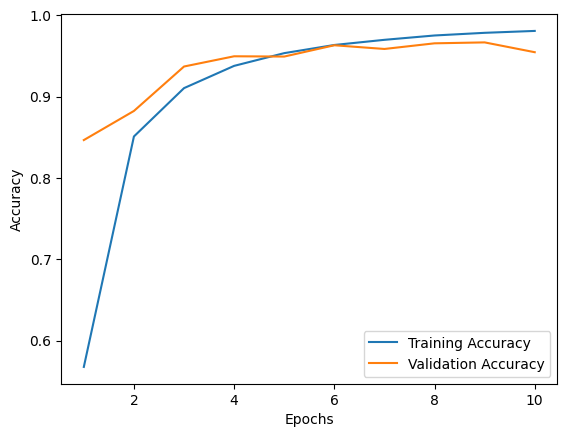

In [36]:
epochs = [ i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\archive (3)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 112s 203ms/step


(array([[1.8586317e-04, 1.8050661e-06, 9.9007002e-06, ..., 2.4824514e-04,
         1.6978379e-07, 4.0722676e-07],
        [7.7271620e-17, 5.9182086e-12, 2.7030492e-16, ..., 8.3704862e-19,
         1.4684772e-19, 3.4727311e-16],
        [5.4164796e-14, 7.9767632e-18, 1.9225955e-13, ..., 2.5897071e-17,
         1.1921549e-22, 1.5844782e-22],
        ...,
        [1.0226254e-09, 3.0447727e-09, 1.2248606e-10, ..., 3.2754500e-08,
         9.7208352e-12, 1.7155258e-11],
        [6.8197912e-03, 1.5983703e-03, 2.2157110e-05, ..., 1.0523410e-08,
         1.1798952e-08, 2.2902443e-08],
        [1.0360573e-17, 1.1900711e-19, 1.5480283e-21, ..., 1.5714428e-26,
         1.7910106e-28, 1.4226608e-20]], shape=(17572, 38), dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 3,  6, 11, ..., 14, 27,  8], shape=(17572,))>

In [41]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(17572, 38), dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 5, 19, 29, ..., 24,  2,  0], shape=(17572,))>

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
classification_report(Y_true,predicted_categories,target_names=class_name)


'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.03      0.03      0.03       504\n                                 Apple___Black_rot       0.02      0.02      0.02       497\n                          Apple___Cedar_apple_rust       0.04      0.04      0.04       440\n                                   Apple___healthy       0.04      0.04      0.04       502\n                               Blueberry___healthy       0.04      0.04      0.04       454\n          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       421\n                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410\n                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       477\n               Corn_(maize)___Northern_Leaf_Blight       0.02      

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[14, 15, 14, ..., 22, 18, 16],
       [12,  9, 16, ..., 13,  8,  8],
       [10, 13, 18, ...,  9,  6, 14],
       ...,
       [16, 10, 11, ..., 16,  8, 14],
       [ 7, 13, 15, ..., 15,  9,  9],
       [15, 18,  9, ..., 11, 11, 14]], shape=(38, 38))

In [46]:
cm.shape

(38, 38)

<Axes: >

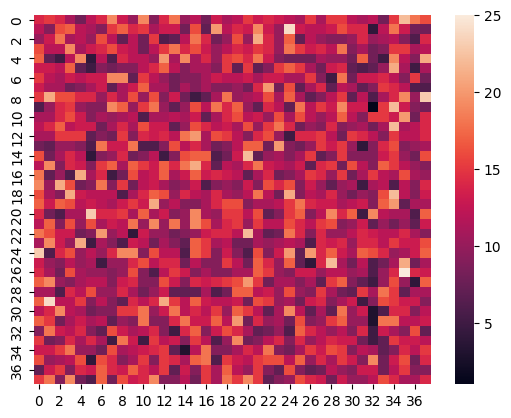

In [47]:
sns.heatmap(cm)

Text(50.722222222222214, 0.5, 'True')

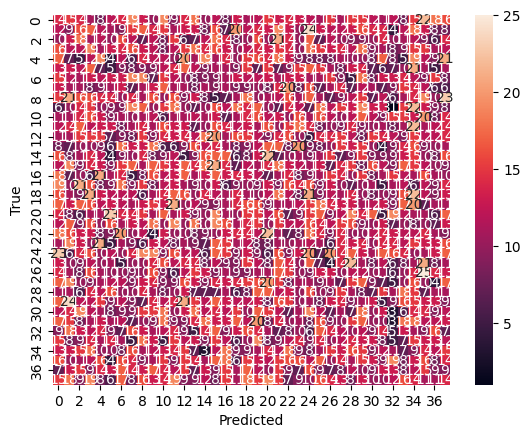

In [48]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')